In [ ]:
version = "2024"
DATASET_DIR = f"/home/ubuntu/mucilage_pipeline/mucilage-detection/{version}/"
l1c_path = "input_l1c.csv"
l2a_path = "output_l2a.csv"

In [67]:
import os
import pandas as pd
import sklearn

In [12]:
l1c_csv = os.path.join(DATASET_DIR, l1c_path)
l2a_csv = os.path.join(DATASET_DIR, l2a_path)


In [14]:
df_l1c = pd.read_csv(l1c_csv)
df_l2a = pd.read_csv(l2a_csv)

In [16]:
df_l1c.shape

(19502, 9)

In [17]:
df_l1c.columns

Index(['Unnamed: 0', 'id_key', 'Name', 'S3Path', 'Footprint', 'GeoFootprint',
       'cloud_cover', 'tile_name', 'single_tile_name'],
      dtype='object')

## Split

Stratified for Tile name - preserve spatial distribution



In [68]:
from sklearn.model_selection import train_test_split

train_df_l1c, test_df_l1c = train_test_split(
    df_l1c,
    test_size=0.15,
    random_state=420,
    stratify = df_l1c["tile_name"]
    )


train_df_l2a, test_df_l2a = df_l2a.loc[train_df_l1c.index], df_l2a.loc[test_df_l1c.index]

### Check overall distribution of tiles

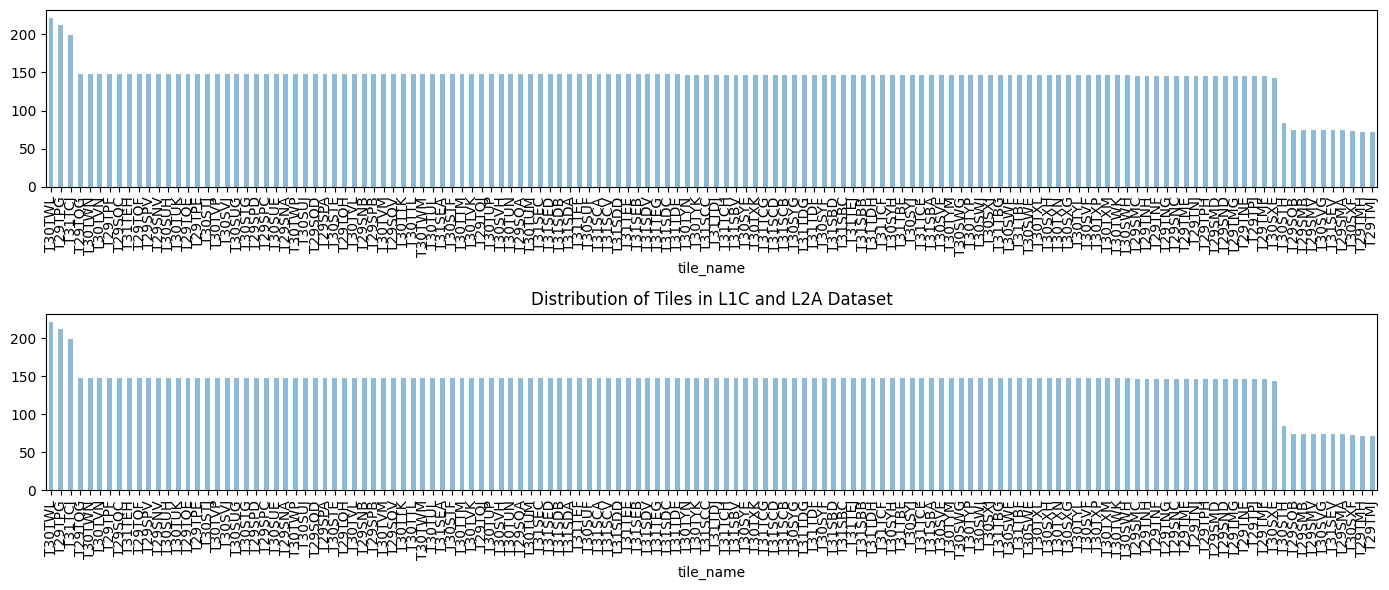

In [28]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))
df_l1c["tile_name"].value_counts().plot(kind='bar', figsize=(14, 6), alpha=0.5, ax=axs[0])
df_l2a["tile_name"].value_counts().plot(kind='bar', figsize=(14, 6), alpha=0.5, ax=axs[1])
plt.title("Distribution of Tiles in L1C and L2A Dataset")
plt.tight_layout()
plt.show()

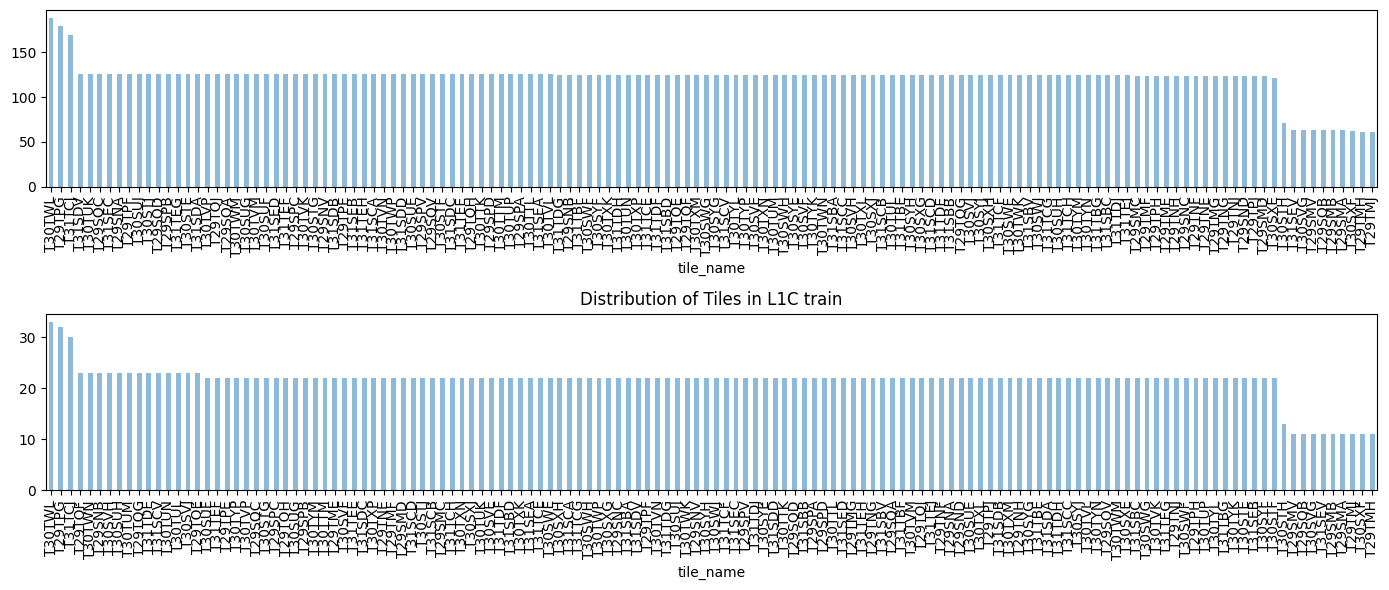

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))
train_df_l1c["tile_name"].value_counts().plot(kind='bar', figsize=(14, 6), alpha=0.5, ax=axs[0])
test_df_l1c["tile_name"].value_counts().plot(kind='bar', figsize=(14, 6), alpha=0.5, ax=axs[1])
plt.title("Distribution of Tiles in L1C train")
plt.tight_layout()
plt.show()

## Cloud check


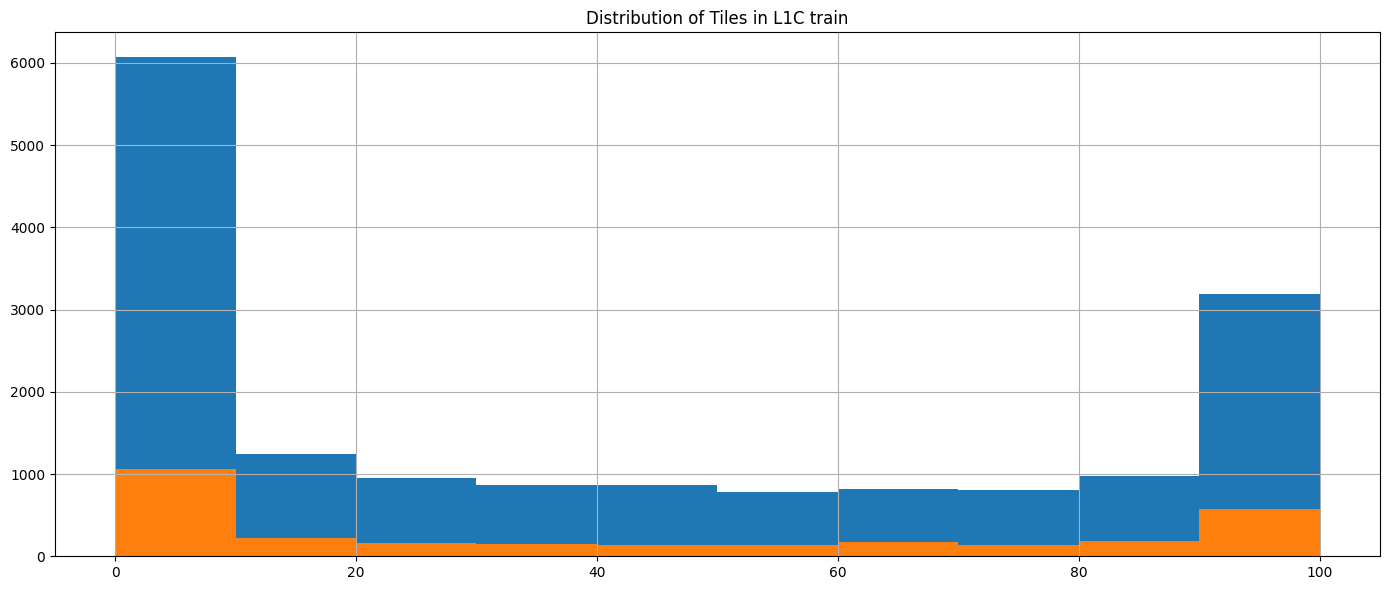

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14, 6))
train_df_l1c["cloud_cover"].hist().plot(kind='bar', alpha=0.5)
test_df_l1c["cloud_cover"].hist().plot(kind='bar', alpha=0.5)
plt.title("Distribution of Tiles in L1C train")
plt.tight_layout()
plt.show()

In [60]:
df_l2a["id_key"].iloc[1000],df_l1c["id_key"].iloc[1000]

('S2A_MSIL1C_20240120T105341_N0510_R051_T31SBV',
 'S2A_MSIL1C_20240120T105341_N0510_R051_T31SBV')

In [75]:
import random 
random_num = random.randint(0, len(train_df_l1c) - 1)
train_df_l1c["id_key"].iloc[random_num],train_df_l2a["id_key"].iloc[random_num]

('S2B_MSIL1C_20240904T105619_N0511_R094_T30TVP',
 'S2B_MSIL1C_20240904T105619_N0511_R094_T30TVP')

## Export to CSV

In [76]:
train_df_l1c.to_csv(os.path.join(DATASET_DIR, "train_l1c.csv"), index=False)
train_df_l2a.to_csv(os.path.join(DATASET_DIR, "train_l2a.csv"), index=False)
test_df_l1c.to_csv(os.path.join(DATASET_DIR, "test_l1c.csv"), index=False)
test_df_l2a.to_csv(os.path.join(DATASET_DIR, "test_l2a.csv"), index=False)